<a href="https://colab.research.google.com/github/dineshb302/TERM2/blob/MLU_SHJ/ML_USL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install yellowbrick

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = 'https://raw.githubusercontent.com/dineshb302/TERM2/7143f5150720b80d83441c9939b6eca6214ef591/Champo%20Carpets%20V1.csv'
df = pd.read_csv(url)
print(df.head())


   OrderiD  Item_Id CustomerCode CountryName customer_country  QtyRequired  \
0        1        5          H-1         USA           H-1USA            6   
1        1       26          H-1         USA           H-1USA            6   
2        1       17          H-1         USA           H-1USA            7   
3        1      496          H-1         USA           H-1USA            7   
4        1       30          H-1         USA           H-1USA            5   

   TotalArea  Amount    ITEM_NAME            QualityName         DesignName  \
0     128.25   769.5  HAND TUFTED  TUFTED 30C HARD TWIST  OLD LONDON [3715]   
1     117.00   702.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   
2      88.00   616.0  HAND TUFTED             TUFTED 60C    WEMBLY [CC-206]   
3      88.00   616.0  HAND TUFTED             TUFTED 60C    SYMPHONY [8900]   
4     117.00   585.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   

     ColorName ShapeName  
0  GREEN/IVORY       REC  
1 

In [9]:
df['Product Category'] = df['ITEM_NAME']+ ' | ' + df['QualityName'] + ' | '+ df['DesignName']+ ' | '+ df['ColorName']+ ' | ' + df['ShapeName']
df['Price'] = df['Amount']/df['QtyRequired']

print(df.head())
print(df.describe())

   OrderiD  Item_Id CustomerCode CountryName customer_country  QtyRequired  \
0        1        5          H-1         USA           H-1USA            6   
1        1       26          H-1         USA           H-1USA            6   
2        1       17          H-1         USA           H-1USA            7   
3        1      496          H-1         USA           H-1USA            7   
4        1       30          H-1         USA           H-1USA            5   

   TotalArea  Amount    ITEM_NAME            QualityName         DesignName  \
0     128.25   769.5  HAND TUFTED  TUFTED 30C HARD TWIST  OLD LONDON [3715]   
1     117.00   702.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   
2      88.00   616.0  HAND TUFTED             TUFTED 60C    WEMBLY [CC-206]   
3      88.00   616.0  HAND TUFTED             TUFTED 60C    SYMPHONY [8900]   
4     117.00   585.0  HAND TUFTED             TUFTED 60C      DUDLEY [9012]   

     ColorName ShapeName                                

In [10]:
Price_unique = df['TotalArea'].nunique()
print("Unique Prices:", Price_unique)

Item_unique = df['Item_Id'].nunique()
print("Unique Items:", Item_unique)

Order_unique = df['OrderiD'].nunique()
print("Unique Order:", Order_unique)

Prodcat_unique = df['Product Category'].nunique()
print("Unique Order:", Prodcat_unique)

# plt.boxplot(df['TotalArea'])
# plt.title('Box Plot of Fact')
# plt.ylabel('Values')
# plt.show()



# plt.scatter(df['TotalArea'], df['QtyRequired'], s=df['Amount']/1000, alpha=0.5)  # 'alpha' is for bubble transparency
# plt.xlabel('Price')
# plt.ylabel('Volume')
# plt.title('Scatter Plot: Price vs Volume, Bubble Size = Sales')
# plt.show()



# Amount = df.groupby('Item_Id')['Amount'].sum().reset_index()
# top_5 = Amount.sort_values(by='Amount', ascending=False).head(5)

# print (top_5)

Unique Prices: 300
Unique Items: 5875
Unique Order: 2412
Unique Order: 1777


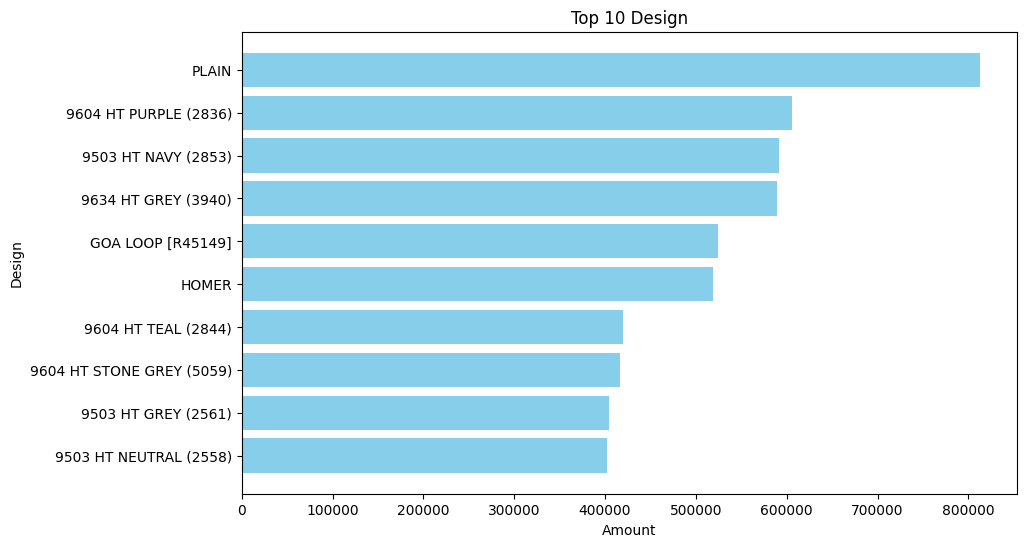

In [11]:
Design_df = df.groupby('DesignName', as_index=False).agg({'Amount': 'sum'})

top_design = Design_df.sort_values(by= 'Amount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_design['DesignName'], top_design['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Design')
plt.title('Top 10 Design')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

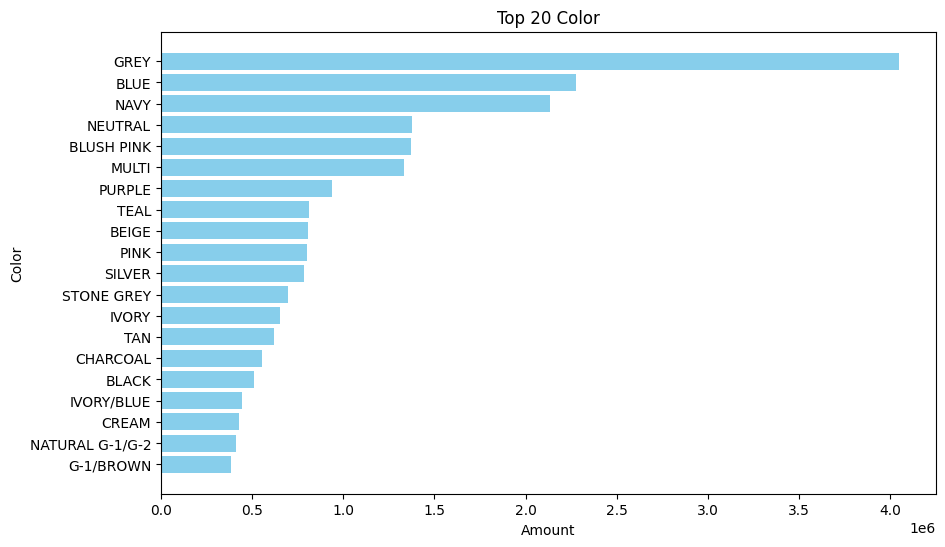

In [12]:
color_df = df.groupby('ColorName', as_index=False).agg({'Amount': 'sum'})

top_color = color_df.sort_values(by= 'Amount', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_color['ColorName'], top_color['Amount'], color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Color')
plt.title('Top 20 Color')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

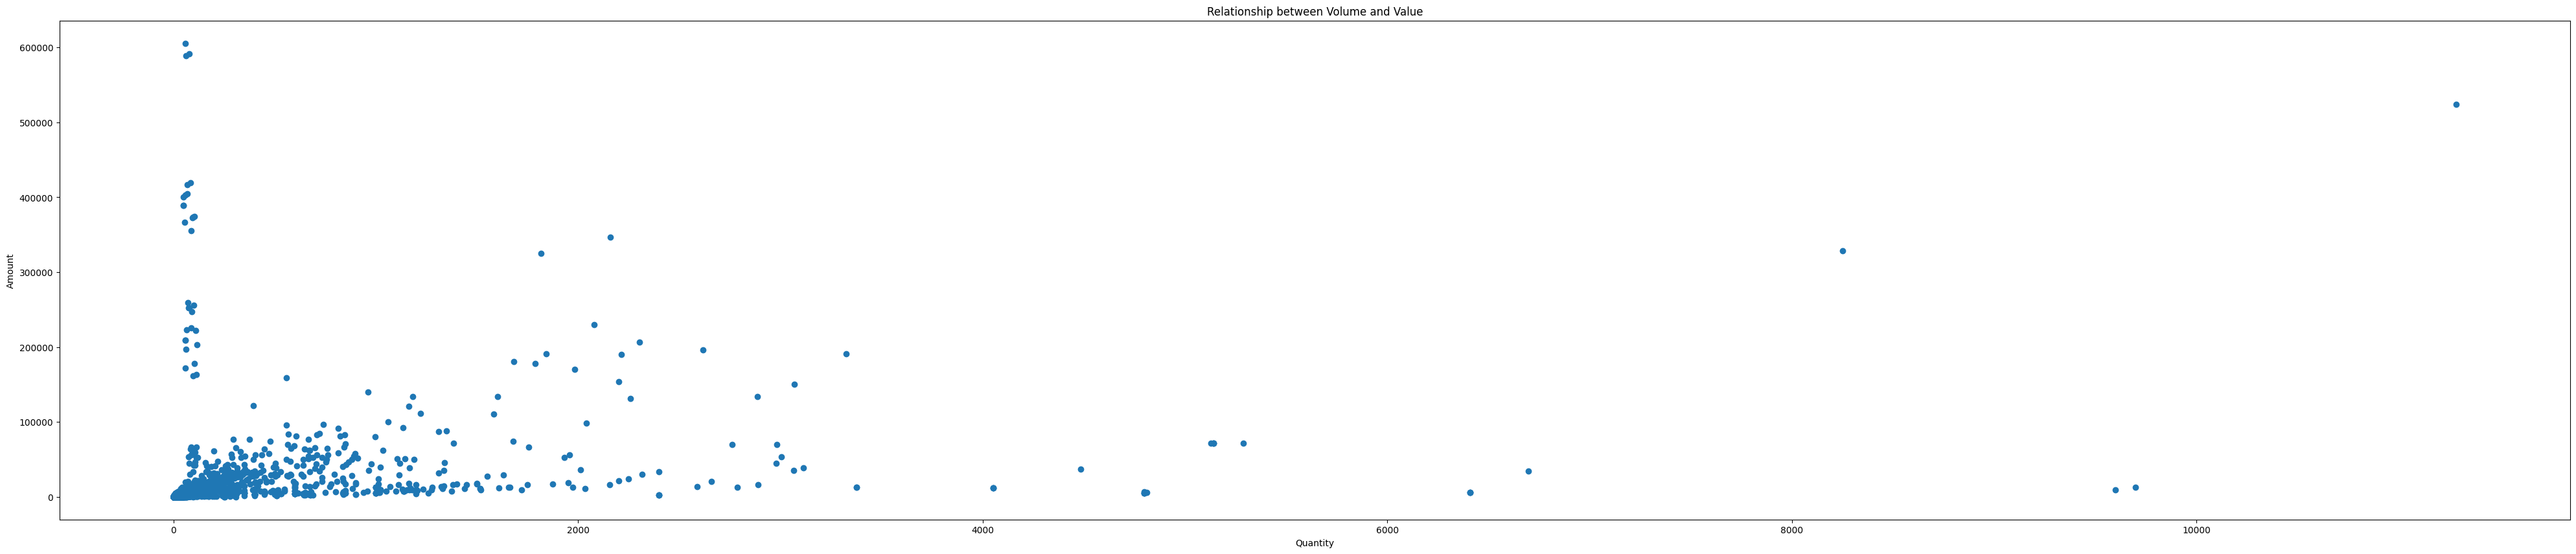

In [13]:
agg_df = df.groupby('Product Category', as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})
# print(agg_df)


plt.figure(figsize=(50, 10))

plt.scatter(agg_df['QtyRequired'], agg_df['Amount'])

# Adding titles and labels
plt.title('Relationship between Volume and Value')
plt.xlabel('Quantity')
plt.ylabel('Amount')

# Optional: Adding annotations for each point
# for i, txt in enumerate(products):
#     plt.annotate(txt, (volume[i], value[i]))

# Display the chart
plt.show()

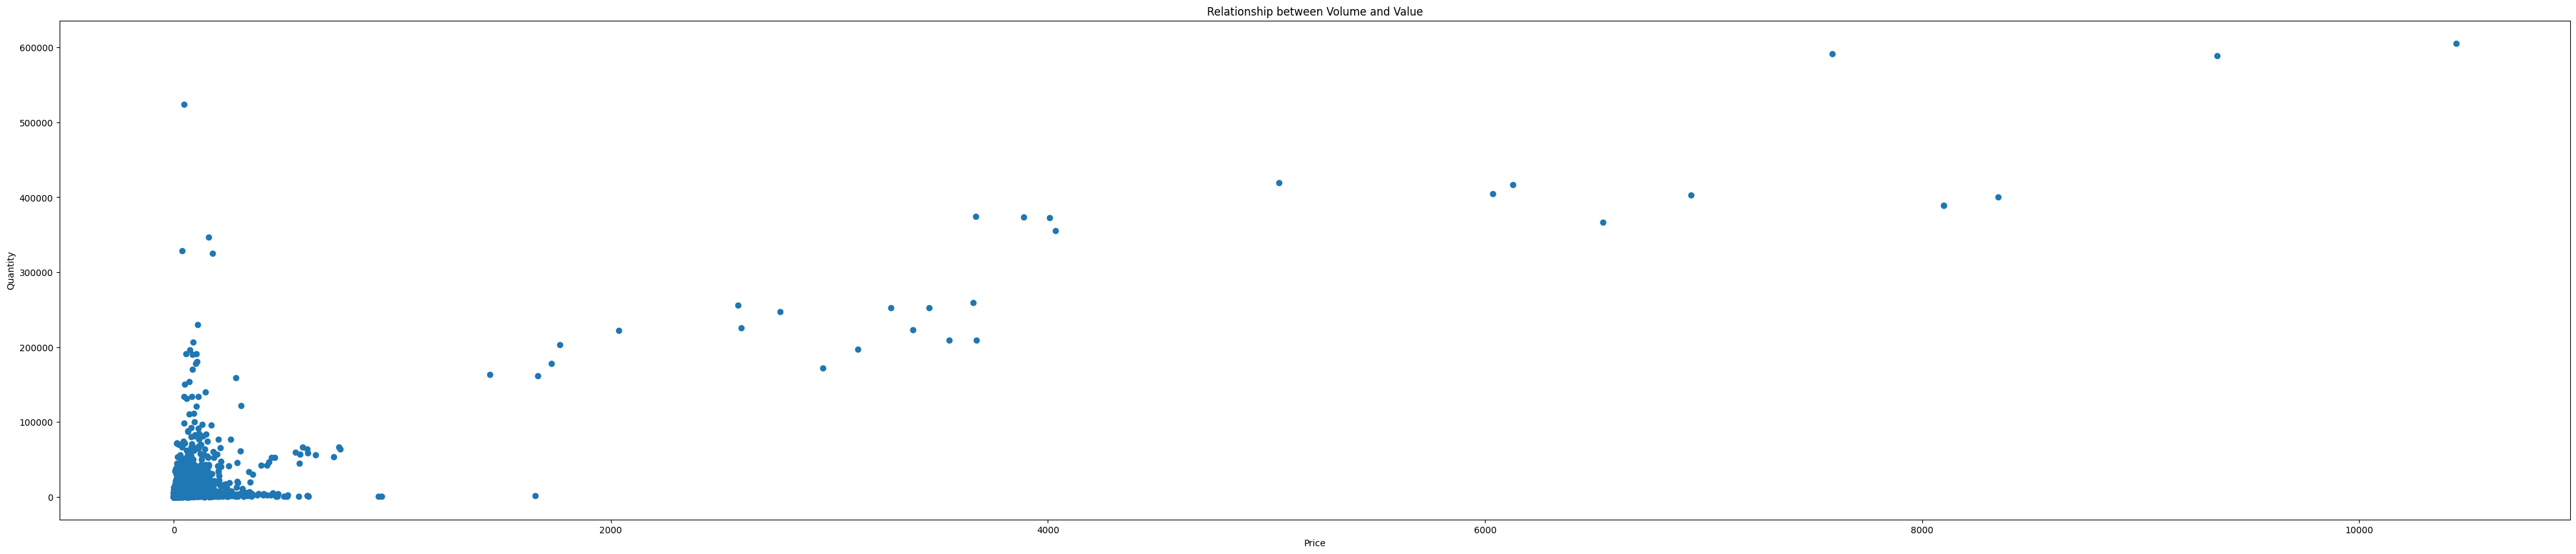

In [14]:
agg_df = df.groupby(['Product Category','ColorName'], as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

plt.figure(figsize=(50, 10))
plt.scatter(agg_df['Price'], agg_df['Amount'])

# Adding titles and labels
plt.title('Relationship between Volume and Value')
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.show()

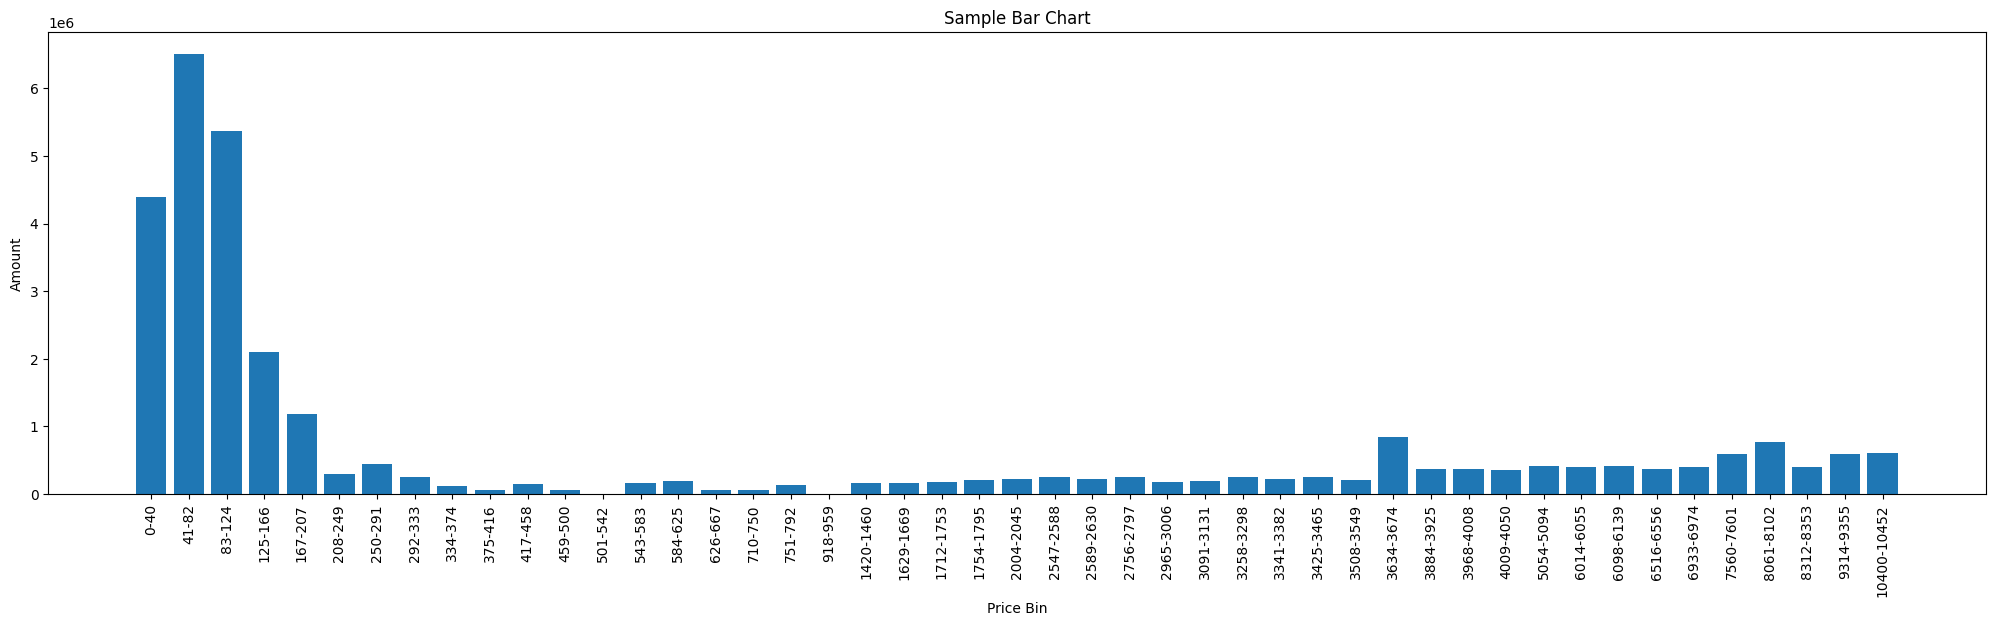

In [15]:
agg_df = df.groupby('Product Category', as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

# Number of bins
n_bins = 250

# Function to create and label bins
def create_labelled_bins( dataframe, column, n_bins):
    # Create bins
    agg_df['Binned'], bins = pd.cut(agg_df['Price'], bins=n_bins, retbins=True, labels=False, right=False)

    # Generate bin labels (e.g., "0-199", "200-399", etc.)
    bin_labels = [f"{int(bins[i])}-{int(bins[i+1])-1}" for i in range(len(bins)-1)]

    # Map bin numbers to labels
    bin_label_map = {i: label for i, label in enumerate(bin_labels)}
    agg_df['BinLabel'] = agg_df['Binned'].map(bin_label_map)

    return dataframe, bin_label_map

# Apply to our dataframe
agg_df, bin_label_map = create_labelled_bins(agg_df, 'Price', n_bins)

# Display the updated DataFrame
price_df = agg_df.groupby(['BinLabel','Binned'], as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})
price_df = price_df.sort_values(by='Binned')

plt.figure(figsize=(25, 6))

plt.bar(price_df['BinLabel'], price_df['Amount'])
# Adding title and labels
plt.title('Sample Bar Chart')
plt.xlabel('Price Bin')
plt.ylabel('Amount')
plt.xticks(rotation=90)
# Displaying the chart
plt.show()

       BinLabel  Binned        Amount  QtyRequired
0          0-40       0  4.389388e+06       391643
27        41-82       1  6.506710e+06       109756
43       83-124       2  5.375877e+06        53742
2       125-166       3  2.096830e+06        14353
5       167-207       4  1.187088e+06         6422
9       208-249       5  2.957274e+05         1335
10      250-291       6  4.420311e+05         1617
14      292-333       7  2.540774e+05          829
18      334-374       8  1.164831e+05          332
23      375-416       9  5.954535e+04          149
28      417-458      10  1.553112e+05          355
29      459-500      11  5.779225e+04          125
30      501-542      12  4.141500e+03            8
32      543-583      13  1.611671e+05          283
33      584-625      14  1.916078e+05          317
36      626-667      15  5.585664e+04           86
39      710-750      17  5.346285e+04           73
40      751-792      18  1.305140e+05          172
45      918-959      22  1.8885

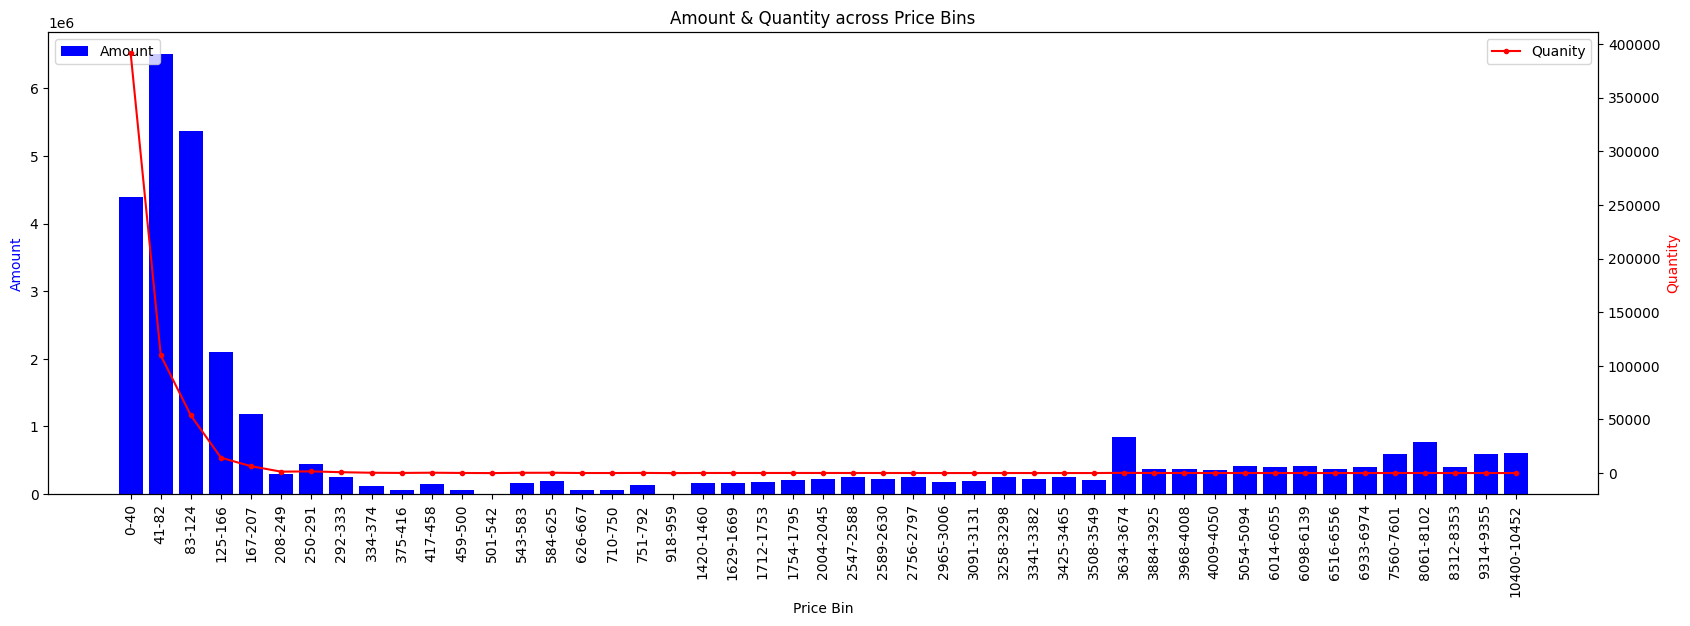

In [16]:
agg_df = df.groupby('Product Category', as_index=False).agg({'Amount': 'sum','QtyRequired':'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

# Number of bins
n_bins = 250

# Function to create and label bins
def create_labelled_bins( dataframe, column, n_bins):
    # Create bins
    agg_df['Binned'], bins = pd.cut(agg_df['Price'], bins=n_bins, retbins=True, labels=False, right=False)

    # Generate bin labels (e.g., "0-199", "200-399", etc.)
    bin_labels = [f"{int(bins[i])}-{int(bins[i+1])-1}" for i in range(len(bins)-1)]

    # Map bin numbers to labels
    bin_label_map = {i: label for i, label in enumerate(bin_labels)}
    agg_df['BinLabel'] = agg_df['Binned'].map(bin_label_map)

    return dataframe, bin_label_map

# Apply to our dataframe
agg_df, bin_label_map = create_labelled_bins(agg_df, 'Price', n_bins)


price_df = agg_df.groupby(['BinLabel','Binned'], as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})
price_df = price_df.sort_values(by='Binned')

print(price_df)

fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90)
ax1.bar(price_df['BinLabel'], price_df['Amount'], color='b', label='Amount')

ax2 = ax1.twinx()
ax2.plot(price_df['BinLabel'], price_df['QtyRequired'], color='r', marker='.', label='Quanity')

ax1.set_xlabel('Price Bin')
ax1.set_ylabel('Amount', color='b')
ax2.set_ylabel('Quantity', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Amount & Quantity across Price Bins')


plt.show()


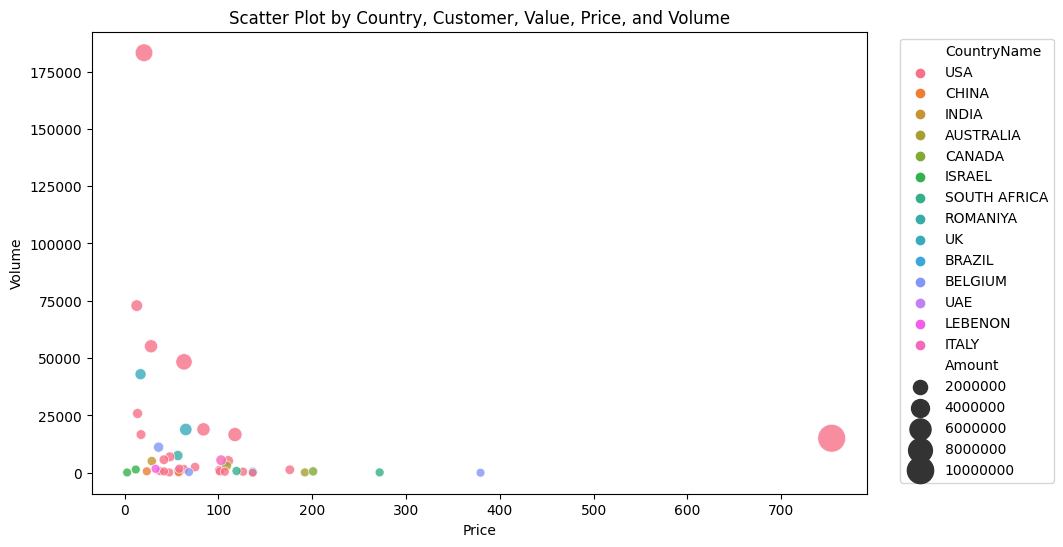

In [17]:
agg_df = df.groupby(['CustomerCode','CountryName'], as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})
agg_df['Price'] = agg_df['Amount']/agg_df['QtyRequired']

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=agg_df, x='Price', y='QtyRequired',
                          size='Amount', hue='CountryName',
                          sizes=(40, 400), alpha=0.8, legend='brief')

# Adjust the legend for better readability
scatter.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('Scatter Plot by Country, Customer, Value, Price, and Volume')

# Show the plot
plt.show()

In [18]:
agg_df = df.groupby('CountryName', as_index=False).agg({'Amount': 'sum', 'QtyRequired': 'sum'})

# Step 1: Aggregate total value and volume by country
share_df = agg_df.groupby('CountryName').sum()

# Step 2: Calculate total value and volume in the dataset
total_amount = agg_df['Amount'].sum()
total_quantity = agg_df['QtyRequired'].sum()

# Step 3: Calculate share for each country
share_df['Share of Total Amount'] = (share_df['Amount'] / total_amount) * 100
share_df['Share of Total Quantity'] = (share_df['QtyRequired'] / total_quantity) * 100


# Step 4: Format the results (optional)
share_df = share_df.drop(columns=['Amount', 'QtyRequired'])

share_df = share_df.sort_values(by='Share of Total Amount', ascending=False)



# Display the results
print(share_df)

              Share of Total Amount  Share of Total Quantity
CountryName                                                 
USA                       86.197786                82.664600
UK                         6.255397                10.587168
ITALY                      1.792198                 0.936317
BELGIUM                    1.358367                 1.962534
ROMANIYA                   1.357841                 1.284440
AUSTRALIA                  1.136044                 0.542989
INDIA                      0.469690                 0.869364
SOUTH AFRICA               0.415214                 0.155140
CANADA                     0.371675                 0.099488
BRAZIL                     0.190574                 0.075001
LEBENON                    0.180597                 0.293156
UAE                        0.140785                 0.132879
CHINA                      0.079314                 0.136817
ISRAEL                     0.054517                 0.260107
